# 1. Install and Import Dependencies

In [1]:
!pip install torch torchvision torchaidio

ERROR: Could not find a version that satisfies the requirement torchaidio (from versions: none)
ERROR: No matching distribution found for torchaidio


In [2]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [16]:
!pip install selenium

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 6.3 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 384 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 4.5 MB/s eta 0:00:011


In [19]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as expected_conditions
import time
import csv

In [28]:
import pandas as pd

In [33]:
import nltk

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [44]:
!pip install wordcloud

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 160 kB 1.7 MB/s eta 0:00:01


# 2. Instantiine Model

## BERT MODEL

In [4]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

## VADER MODEL

# 3. Encode and Calculate Sentiment

## BERT MODEL

In [5]:
tokens = tokenizer.encode('It was a Great Experience! I would definitely fly with Singapore Airlines again!', return_tensors='pt')

In [6]:
tokens

tensor([[  101, 10197, 10140,   143, 11838, 16277,   106,   151, 11008, 69923,
         27393, 19158, 10171, 19649, 17694, 12590,   106,   102]])

In [7]:
tokens[0]

tensor([  101, 10197, 10140,   143, 11838, 16277,   106,   151, 11008, 69923,
        27393, 19158, 10171, 19649, 17694, 12590,   106,   102])

In [8]:
tokenizer.decode(tokens[0])

'[CLS] it was a great experience! i would definitely fly with singapore airlines again! [SEP]'

In [9]:
result = model(tokens)

In [10]:
result

SequenceClassifierOutput(loss=None, logits=tensor([[-2.1834, -2.2341, -0.8046,  1.4386,  2.9149]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [11]:
result.logits

tensor([[-2.1834, -2.2341, -0.8046,  1.4386,  2.9149]],
       grad_fn=<AddmmBackward0>)

In [12]:
int(torch.argmax(result.logits))+1

5

In [35]:
def bert_model(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1


## VADER MODEL

# 4. Collect Reviews

In [ ]:
r = requests.get('https://www.tripadvisor.com/Airline_Review-d8729151-Reviews-Singapore-Airlines')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

In [20]:
url = "https://www.tripadvisor.com/Airline_Review-d8729151-Reviews-Singapore-Airlines"

In [22]:
!apt-get update
!apt install chromium-chromedriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
zsh:1: command not found: apt-get
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable thi

/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_1674/2589910448.py:8: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [23]:
driver.get(url)

In [31]:
reviews_list = []
for i in range(0, 1000):
    reviews = driver.find_elements(By.XPATH, "(//q[@class='QewHA H4 _a']/span)") 
    for review in range(len(reviews)):
        reviews_list.append(reviews[review].text)  

    driver.find_element(By.XPATH, "//a[@class='ui_button nav next primary ']").click()
    time.sleep(2)

driver.quit

WebDriverException: Message: disconnected: Unable to receive message from renderer
  (failed to check if window was closed: timeout: Timed out receiving message from renderer: 600.000)
  (Session info: headless chrome=108.0.5359.124)
Stacktrace:
0   chromedriver                        0x000000010471cf38 chromedriver + 4910904
1   chromedriver                        0x000000010469ca03 chromedriver + 4385283
2   chromedriver                        0x00000001042e1747 chromedriver + 472903
3   chromedriver                        0x00000001042ca427 chromedriver + 377895
4   chromedriver                        0x00000001042ca0a0 chromedriver + 376992
5   chromedriver                        0x00000001042c87f2 chromedriver + 370674
6   chromedriver                        0x00000001042c8d18 chromedriver + 371992
7   chromedriver                        0x00000001042ef8e1 chromedriver + 530657
8   chromedriver                        0x00000001042e53c0 chromedriver + 488384
9   chromedriver                        0x00000001042e4c30 chromedriver + 486448
10  chromedriver                        0x00000001042e599e chromedriver + 489886
11  chromedriver                        0x00000001042e5dfc chromedriver + 491004
12  chromedriver                        0x000000010431eba5 chromedriver + 723877
13  chromedriver                        0x000000010434c112 chromedriver + 909586
14  chromedriver                        0x00000001043180ed chromedriver + 696557
15  chromedriver                        0x000000010434c2ce chromedriver + 910030
16  chromedriver                        0x000000010436728e chromedriver + 1020558
17  chromedriver                        0x000000010434bee3 chromedriver + 909027
18  chromedriver                        0x000000010431630c chromedriver + 688908
19  chromedriver                        0x000000010431788e chromedriver + 694414
20  chromedriver                        0x00000001046ea1de chromedriver + 4702686
21  chromedriver                        0x00000001046eeb19 chromedriver + 4721433
22  chromedriver                        0x00000001046f628e chromedriver + 4752014
23  chromedriver                        0x00000001046ef91a chromedriver + 4725018
24  chromedriver                        0x00000001046c3b02 chromedriver + 4545282
25  chromedriver                        0x000000010470e888 chromedriver + 4851848
26  chromedriver                        0x000000010470ea05 chromedriver + 4852229
27  chromedriver                        0x0000000104724e5f chromedriver + 4943455
28  libsystem_pthread.dylib             0x00007ff810af3259 _pthread_start + 125
29  libsystem_pthread.dylib             0x00007ff810aeec7b thread_start + 15


In [32]:
print(len(reviews_list))

577


# 5. Load Reviews into DataFrame and Score

In [36]:
reviews = pd.DataFrame(list(zip(reviews_list)), columns=['Review'])
reviews.head(5)

,Review
0,Tried to contact SQ customer service is a joke...
1,I thought that I could trust Singapore Airline...
2,My first post-COVID Singapore flight and I was...
3,Back in October 2022 I booked a ticket on the ...
4,I was at the airport early. There was one coun...


In [37]:
reviews.tail(5)

,Review
572,The flights were on time both in Sydney and th...
573,Cabin - stunning puts its rivals to bed & keep...
574,Singapore Airlines' service standards continue...
575,after a 48 hour flight transferring from Macau...
576,I fully understand that it is difficult for ai...


In [40]:
reviews['bert_score'] = reviews['Review'].apply(lambda x: bert_model(x))
reviews['vader_compound'] = reviews['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [41]:
reviews

,Review,bert_score,vader_compound
0,Tried to contact SQ customer service is a joke...,1,0.6124
1,I thought that I could trust Singapore Airline...,2,0.0387
2,My first post-COVID Singapore flight and I was...,5,0.9542
3,Back in October 2022 I booked a ticket on the ...,1,-0.5046
4,I was at the airport early. There was one coun...,1,0.0000
...,...,...,...
572,The flights were on time both in Sydney and th...,4,0.8074
573,Cabin - stunning puts its rivals to bed & keep...,5,0.6369
574,Singapore Airlines' service standards continue...,1,-0.8847
575,after a 48 hour flight transferring from Macau...,1,0.5187


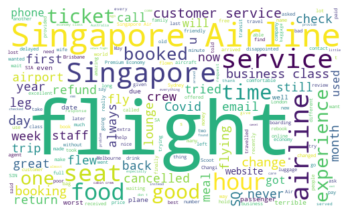

In [48]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in reviews['Review']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, background_color="white").generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
def get_sentiment(compound):
    if compound < 0:
        return 'negative'
    elif compound == 0:
        return 'neutral'
    else:
        return 'positive'

In [51]:
reviews['sentiment'] = reviews['vader_compound'].apply(lambda x: get_sentiment(x))

In [52]:
reviews

,Review,bert_score,vader_compound,sentiment
0,Tried to contact SQ customer service is a joke...,1,0.6124,positive
1,I thought that I could trust Singapore Airline...,2,0.0387,positive
2,My first post-COVID Singapore flight and I was...,5,0.9542,positive
3,Back in October 2022 I booked a ticket on the ...,1,-0.5046,negative
4,I was at the airport early. There was one coun...,1,0.0000,neutral
...,...,...,...,...
572,The flights were on time both in Sydney and th...,4,0.8074,positive
573,Cabin - stunning puts its rivals to bed & keep...,5,0.6369,positive
574,Singapore Airlines' service standards continue...,1,-0.8847,negative
575,after a 48 hour flight transferring from Macau...,1,0.5187,positive


## bert sentiment

In [60]:
reviews['bert_score'].value_counts()

1    305
2    112
5     72
4     54
3     34
Name: bert_score, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

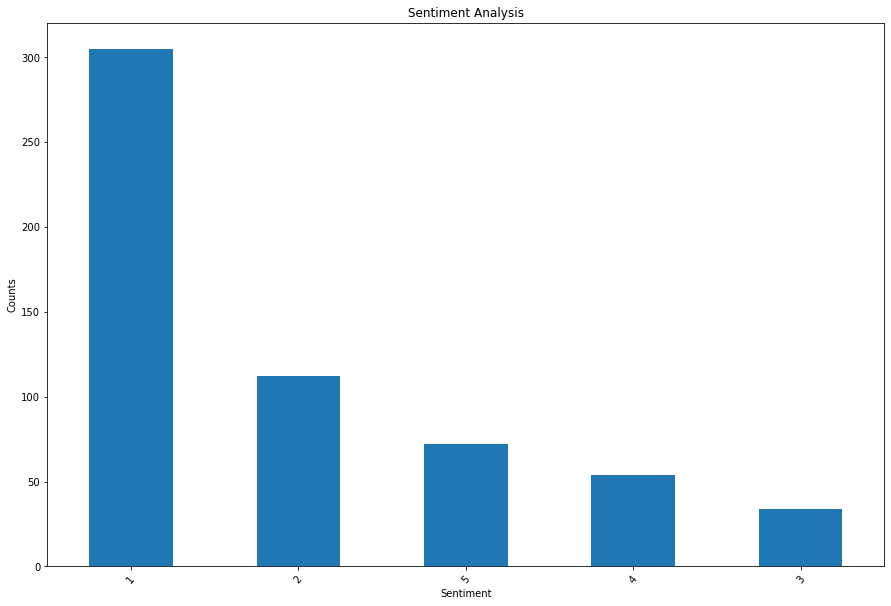

In [61]:
plt.figure(figsize=(15,10))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
reviews['bert_score'].value_counts().plot.bar()
plt.xticks(rotation=50)
plt.show

Text(0.5, 0, 'Airlines Review Sentiment')

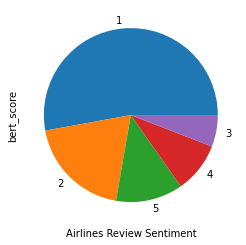

In [63]:
reviews.bert_score.value_counts().plot.pie()
plt.xlabel("Airlines Review Sentiment")

## vader sentiment

In [53]:
reviews['sentiment'].value_counts()

negative    279
positive    267
neutral      31
Name: sentiment, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

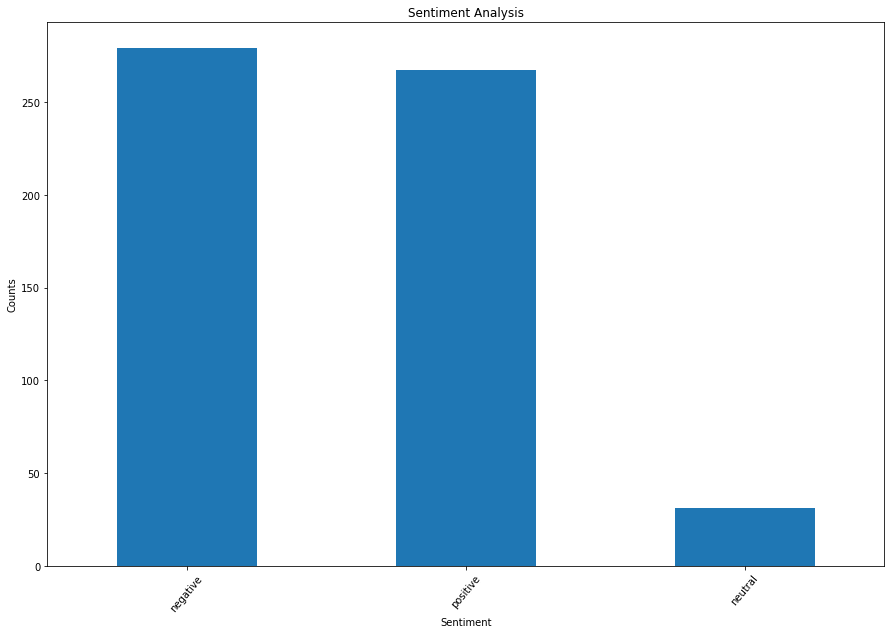

In [62]:
plt.figure(figsize=(15,10))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
reviews['sentiment'].value_counts().plot.bar()
plt.xticks(rotation=50)
plt.show

Text(0.5, 0, 'Airlines Review Sentiment')

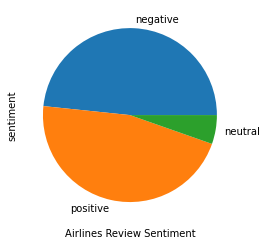

In [57]:
reviews.sentiment.value_counts().plot.pie()
plt.xlabel("Airlines Review Sentiment")

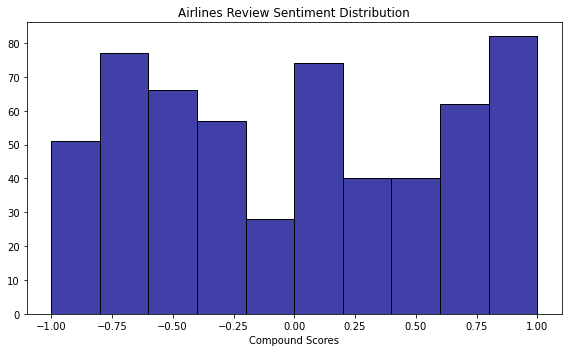

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(reviews, x='vader_compound', color="darkblue", bins=10, binrange=(-1,1))
plt.title("Airlines Review Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

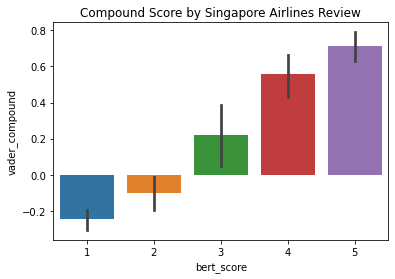

In [67]:
ax = sns.barplot(data=reviews, x='bert_score', y='vader_compound')
ax.set_title('Compound Score by Singapore Airlines Review')
plt.show()